In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib
import json
import os

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9745,-121.70,36.67,37.0,641.0,129.0,458.0,142.0,3.3456,<1H OCEAN,252600.0
15718,-122.43,37.78,10.0,2380.0,843.0,1245.0,789.0,1.3062,NEAR BAY,220000.0
1157,-121.47,39.51,19.0,3720.0,636.0,1304.0,607.0,2.6921,INLAND,97500.0
15367,-117.20,33.29,12.0,6358.0,1182.0,2778.0,1020.0,4.0357,<1H OCEAN,295900.0
6302,-117.98,34.03,21.0,797.0,162.0,484.0,166.0,2.6250,<1H OCEAN,191100.0
...,...,...,...,...,...,...,...,...,...,...
1623,-122.14,37.85,27.0,9147.0,1276.0,3371.0,1269.0,7.3267,NEAR BAY,389900.0
13052,-121.30,38.61,25.0,2707.0,464.0,1423.0,490.0,4.3235,INLAND,116900.0
2629,-124.19,40.73,21.0,5694.0,1056.0,2907.0,972.0,3.5363,NEAR OCEAN,90100.0
4083,-118.38,34.15,36.0,2933.0,619.0,1115.0,579.0,4.3036,<1H OCEAN,365900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

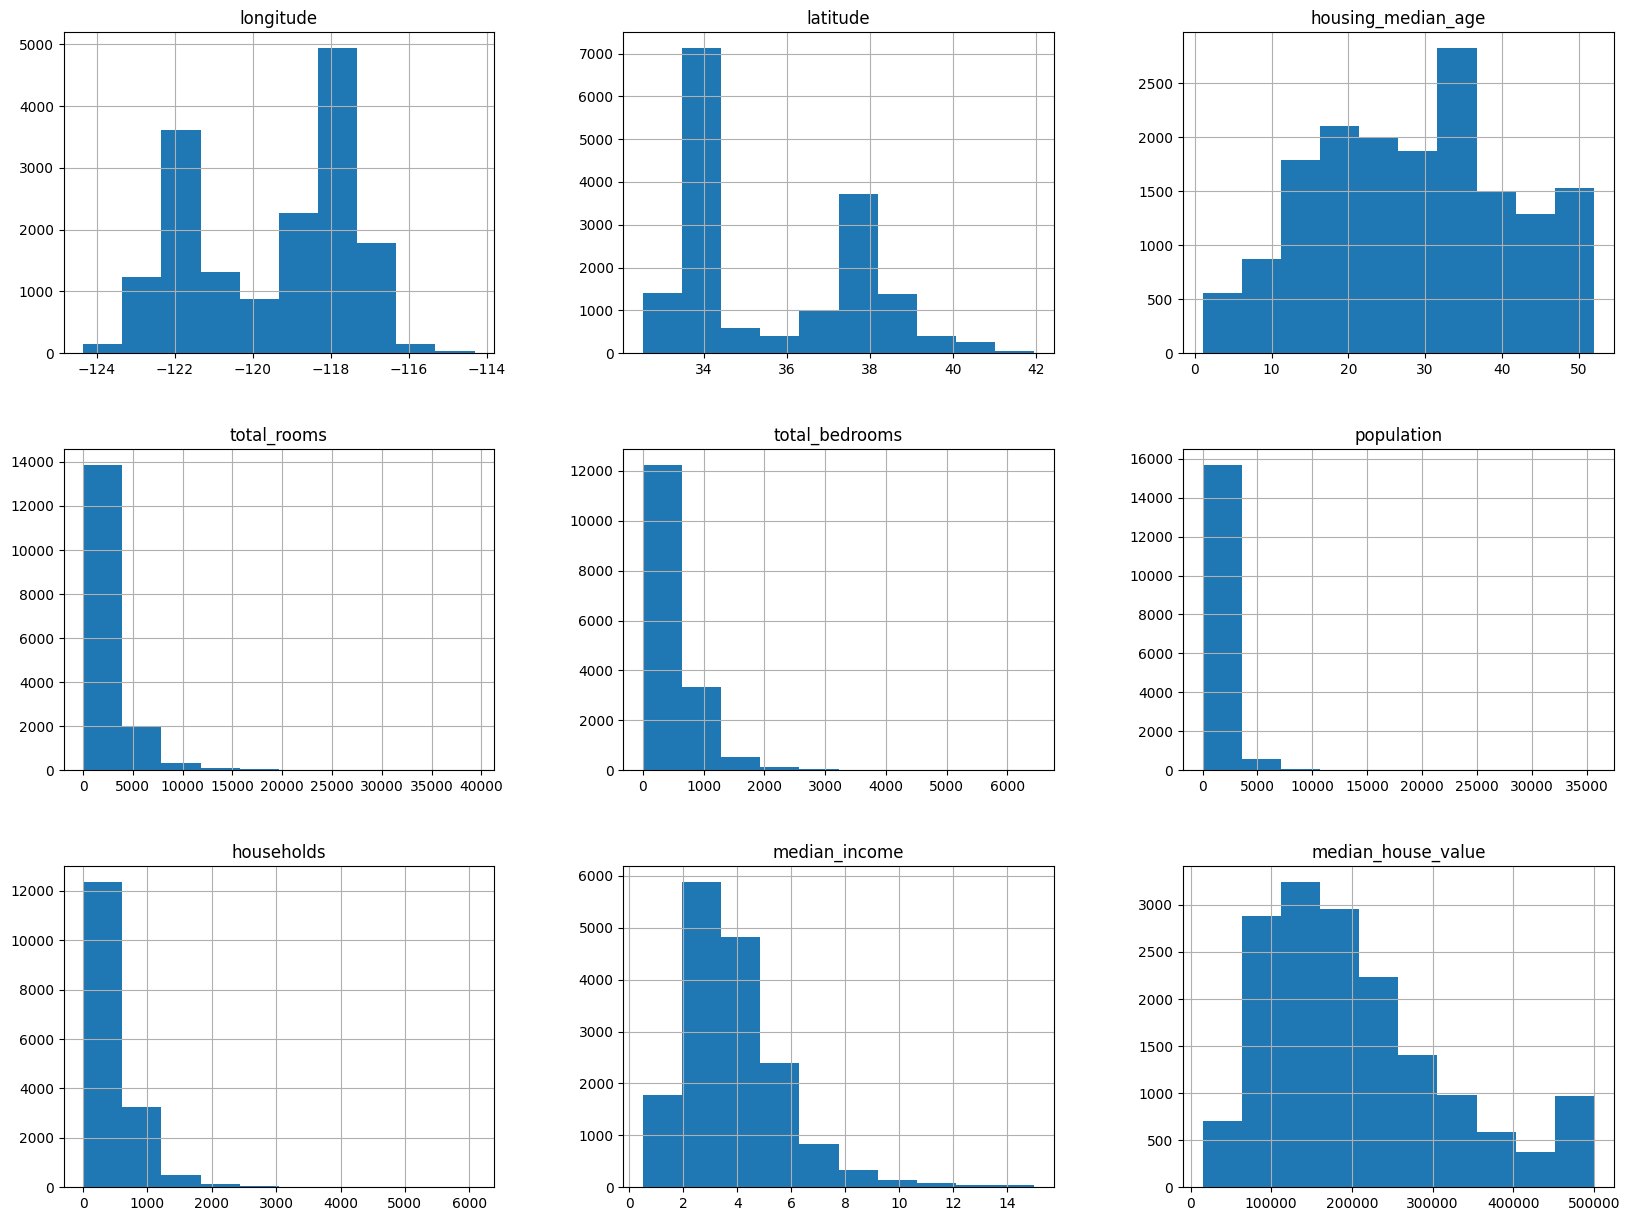

In [11]:
train_data.hist(figsize=(20,15))

In [12]:
train_data['total_rooms'] = np.log1p(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log1p(train_data['population'] + 1)
train_data['households'] = np.log1p(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

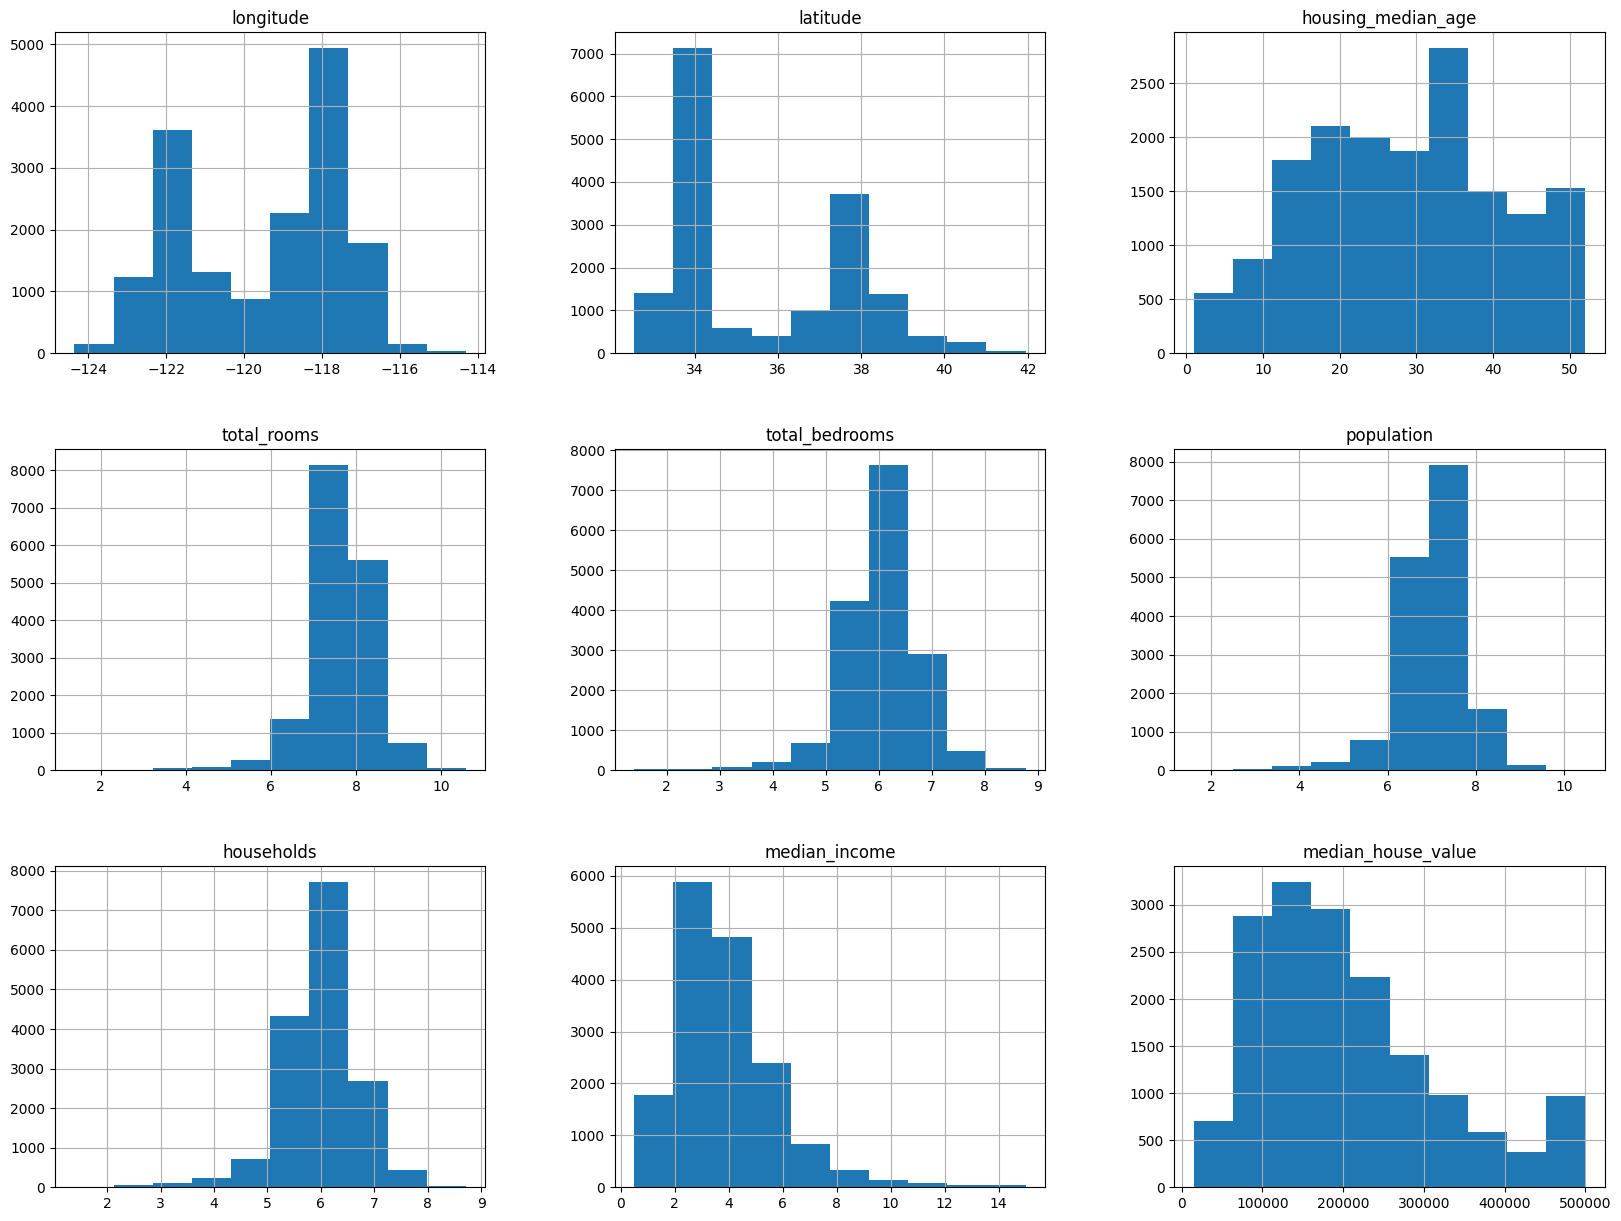

In [13]:
train_data.hist(figsize=(20,15))

In [14]:
train_data = pd.get_dummies(train_data, columns=['ocean_proximity'])

In [15]:
bool_cols = train_data.select_dtypes('bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9745,-121.70,36.67,37.0,6.466145,4.875197,6.131226,4.969813,3.3456,252600.0,1,0,0,0,0
15718,-122.43,37.78,10.0,7.775696,6.739337,7.128496,6.673298,1.3062,220000.0,0,0,0,1,0
1157,-121.47,39.51,19.0,8.222016,6.458338,7.174724,6.411818,2.6921,97500.0,0,1,0,0,0
15367,-117.20,33.29,12.0,8.757784,7.076654,7.930206,6.929517,4.0357,295900.0,1,0,0,0,0
6302,-117.98,34.03,21.0,6.683361,5.099866,6.186209,5.123964,2.6250,191100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,-122.14,37.85,27.0,9.121400,7.153052,8.123558,7.147559,7.3267,389900.0,0,0,0,1,0
13052,-121.30,38.61,25.0,7.904335,6.144186,7.261927,6.198479,4.3235,116900.0,0,1,0,0,0
2629,-124.19,40.73,21.0,8.647519,6.964136,7.975565,6.881411,3.5363,90100.0,0,0,0,0,1
4083,-118.38,34.15,36.0,7.984463,6.431331,7.018402,6.364751,4.3036,365900.0,1,0,0,0,0


<Axes: >

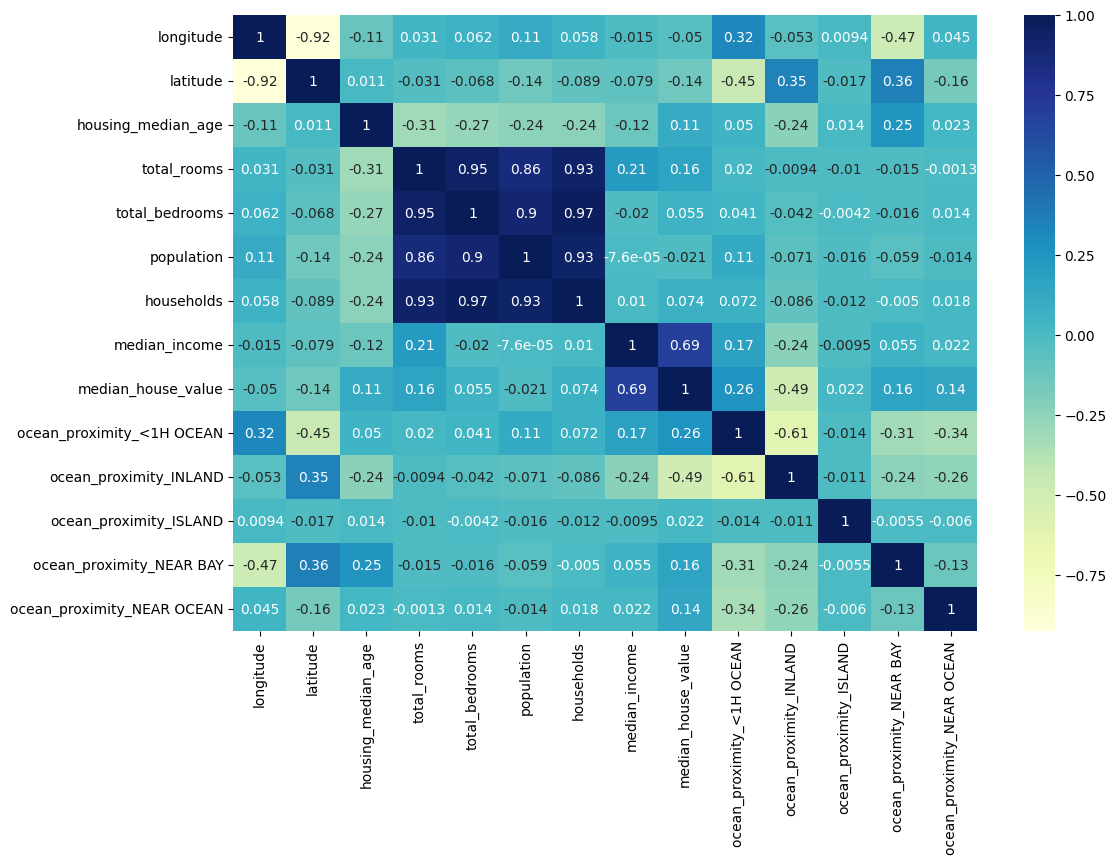

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

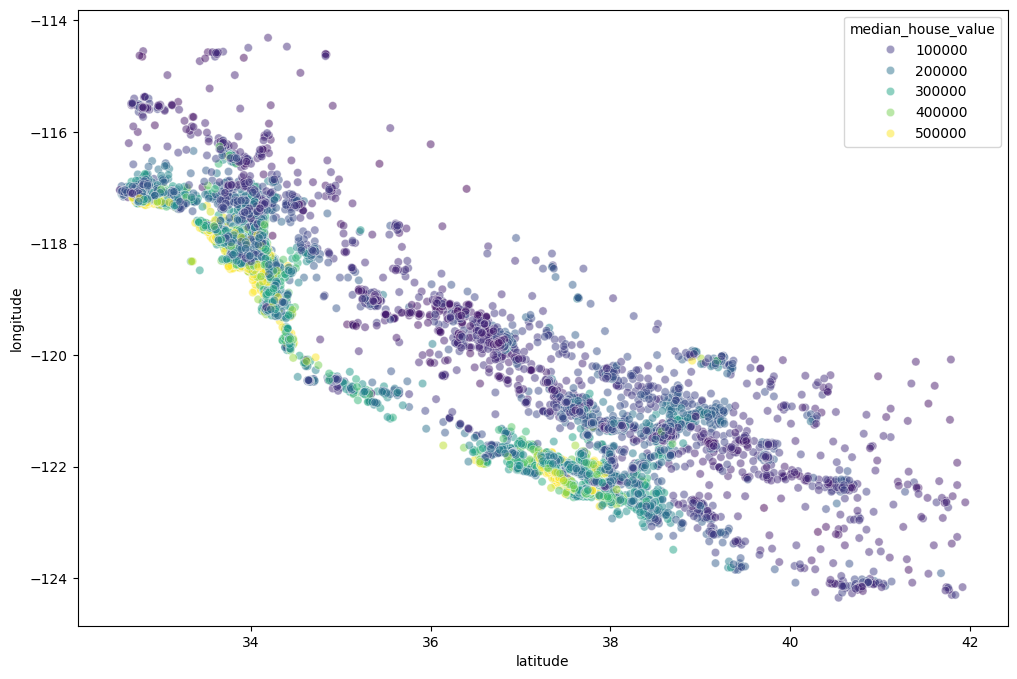

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='viridis', alpha=0.5)

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

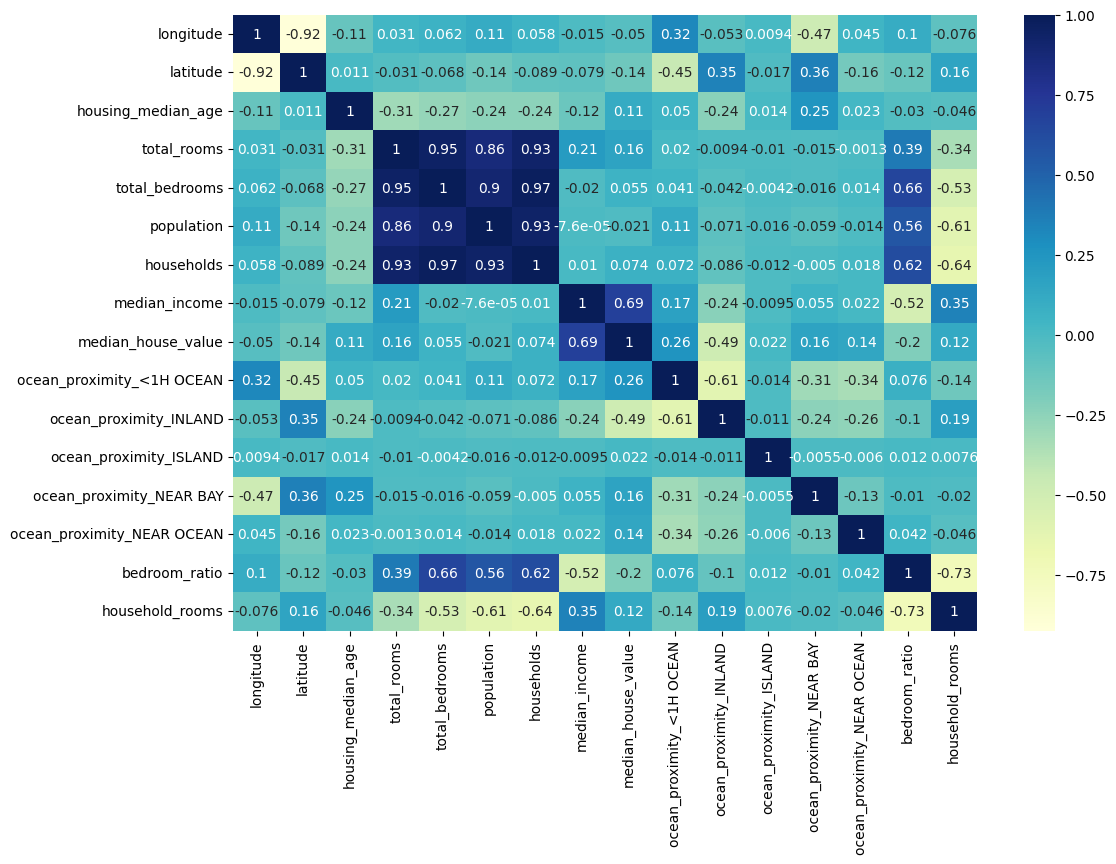

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [21]:
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log1p(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log1p(test_data['population'] + 1)
test_data['households'] = np.log1p(test_data['households'] + 1)

test_data = pd.get_dummies(test_data, columns=['ocean_proximity'])
bol_cols = test_data.select_dtypes('bool').columns
test_data[bol_cols] = test_data[bol_cols].astype(int)
for col in train_data.columns:
    if col not in test_data.columns:
        test_data[col] = 0 

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [23]:
x_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

In [24]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
15358,-117.33,33.23,15.0,7.553287,6.035481,7.138867,5.966147,3.3300,127900.0,0,0,0,0,1,0.799054,1.266024
12242,-116.97,33.75,22.0,8.227376,6.874198,7.607381,6.716595,1.3039,77500.0,0,1,0,0,0,0.835528,1.224933
18716,-122.40,40.62,9.0,8.475538,6.792344,7.679714,6.765039,3.1439,103100.0,0,1,0,0,0,0.801406,1.252844
15674,-122.44,37.80,52.0,7.380879,6.192362,6.591674,6.144186,3.9856,500001.0,0,0,0,1,0,0.838974,1.201279
17362,-120.41,34.87,15.0,7.336937,5.533389,6.637258,5.488938,4.9028,193600.0,1,0,0,0,0,0.754183,1.336677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20272,-119.23,34.19,16.0,8.575273,6.699500,7.307202,6.505784,6.4522,500001.0,0,0,0,0,1,0.781258,1.318100
11258,-117.97,33.81,26.0,8.300032,6.987490,7.807510,6.910751,2.8042,206300.0,1,0,0,0,0,0.841863,1.201032
14599,-117.17,32.82,24.0,7.359468,5.937536,6.575076,5.777652,3.1146,187500.0,0,0,0,0,1,0.806789,1.273782
5444,-118.43,34.00,30.0,7.673223,6.395262,7.202661,6.329721,3.3995,324000.0,1,0,0,0,0,0.833452,1.212253


In [25]:
x_test = x_test[x_train.columns]
reg.score(x_test,y_test)

0.6651478082702948

In [26]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
forest.score(x_test, y_test)

0.8119143269680473

In [28]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(x_train_s, y_train)


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest.score(x_test_s, y_test)

0.7828046574629118

In [32]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [33]:
tree.score(x_test, y_test)

0.6434106942150267

In [34]:
joblib.dump(best_forest, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [41]:
print(x_train.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')


In [44]:
os.makedirs("backend/model", exist_ok=True)

# Save the feature names list to correct path
with open("backend/model/feature_names.json", "w") as f:
    json.dump(list(x_train.columns), f)